In [1]:
# import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# 1.1

In [2]:


# Define the transformations for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the MNIST dataset
mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Split the dataset into train, validation, and test sets
train_size = int(0.8 * len(mnist_data))
val_size = int(0.1 * len(mnist_data))
test_size = len(mnist_data) - train_size - val_size

train_data, val_data, test_data = random_split(mnist_data, [train_size, val_size, test_size])

# Create dataloaders for each set
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Print the sizes of each set
print(f'Train set size: {len(train_data)}')
print(f'Validation set size: {len(val_data)}')
print(f'Test set size: {len(test_data)}')

Train set size: 48000
Validation set size: 6000
Test set size: 6000


In [3]:
num_gpus = torch.cuda.device_count()
for i in range(num_gpus):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
    print(f"  Memory Allocated: {torch.cuda.memory_allocated(i) / 1024 ** 2:.2f} MB")
    print(f"  Memory Cached: {torch.cuda.memory_reserved(i) / 1024 ** 2:.2f} MB")
    print(f"  Memory Free: {(torch.cuda.get_device_properties(i).total_memory - torch.cuda.memory_allocated(i)) / 1024 ** 2:.2f} MB")
    print(f"  Total Memory: {torch.cuda.get_device_properties(i).total_memory / 1024 ** 2:.2f} MB")
    print()

GPU 0: NVIDIA RTX A4000
  Memory Allocated: 0.00 MB
  Memory Cached: 0.00 MB
  Memory Free: 16101.75 MB
  Total Memory: 16101.75 MB

GPU 1: NVIDIA RTX A4000
  Memory Allocated: 0.00 MB
  Memory Cached: 0.00 MB
  Memory Free: 16101.75 MB
  Total Memory: 16101.75 MB

GPU 2: NVIDIA RTX A4000
  Memory Allocated: 0.00 MB
  Memory Cached: 0.00 MB
  Memory Free: 16101.75 MB
  Total Memory: 16101.75 MB

GPU 3: NVIDIA RTX A4000
  Memory Allocated: 0.00 MB
  Memory Cached: 0.00 MB
  Memory Free: 16101.75 MB
  Total Memory: 16101.75 MB

GPU 4: NVIDIA RTX A4000
  Memory Allocated: 0.00 MB
  Memory Cached: 0.00 MB
  Memory Free: 16101.75 MB
  Total Memory: 16101.75 MB

GPU 5: NVIDIA RTX A4000
  Memory Allocated: 0.00 MB
  Memory Cached: 0.00 MB
  Memory Free: 16101.75 MB
  Total Memory: 16101.75 MB



In [12]:
if torch.cuda.is_available() and torch.cuda.device_count() > 2:
    device = torch.device("cuda:2")
    print(f"Using GPU: {torch.cuda.get_device_name(2)}")
else:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("Using default GPU or CPU")

Using GPU: NVIDIA RTX A4000


In [22]:
def visualize_generator_output(G, z_dim, device,num_images=10):
    # Generate random noise
    z = torch.randn(num_images, z_dim).to(device)
    
    # Generate fake images
    fake_images = G(z)
    
    # Reshape fake images to 28x28
    fake_images = fake_images.view(fake_images.size(0), 28, 28).cpu().detach().numpy()
    
    # Plot the fake images
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(fake_images[i], cmap='gray')
        plt.axis('off')
    plt.show()

Epoch [1/301], D Loss: 0.2703614961480101, G Loss: 3.4684847836494446
Generator output at epoch 0


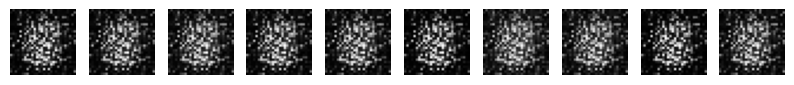

Epoch [2/301], D Loss: 0.19488809825479983, G Loss: 3.850925637245178
Epoch [3/301], D Loss: 0.23316980690509082, G Loss: 3.3814094286759695
Epoch [4/301], D Loss: 0.08960987094044685, G Loss: 4.634913664499918
Epoch [5/301], D Loss: 0.07766605561847488, G Loss: 5.137167527834574
Epoch [6/301], D Loss: 0.09569038118049503, G Loss: 5.402994567871094
Epoch [7/301], D Loss: 0.09203243131625155, G Loss: 5.683527985890707
Epoch [8/301], D Loss: 0.1015341406725347, G Loss: 5.308466542561849
Epoch [9/301], D Loss: 0.10803771739080548, G Loss: 5.580746022860209
Epoch [10/301], D Loss: 0.11396468186875185, G Loss: 5.545993736902873
Epoch [11/301], D Loss: 0.140182171408087, G Loss: 5.60714174747467
Generator output at epoch 10


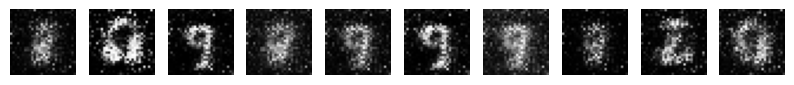

Epoch [12/301], D Loss: 0.12901976779475807, G Loss: 5.4371985940933225
Epoch [13/301], D Loss: 0.10143130224384367, G Loss: 6.018995250066121
Epoch [14/301], D Loss: 0.11270201151057457, G Loss: 5.976215828259786
Epoch [15/301], D Loss: 0.11167736233770847, G Loss: 6.353183555603027
Epoch [16/301], D Loss: 0.1266595839187503, G Loss: 5.727300067265828
Epoch [17/301], D Loss: 0.13642952494695781, G Loss: 5.731954417864482
Epoch [18/301], D Loss: 0.14385042064885298, G Loss: 6.080300686518351
Epoch [19/301], D Loss: 0.16358349589134255, G Loss: 5.783366345405579
Epoch [20/301], D Loss: 0.1802169609790047, G Loss: 5.084639258384705
Epoch [21/301], D Loss: 0.18776372645795344, G Loss: 5.262390157699585
Generator output at epoch 20


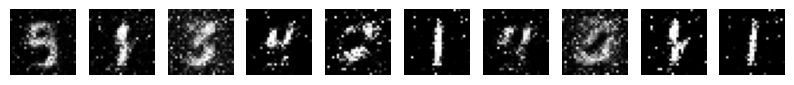

Epoch [22/301], D Loss: 0.21489495170116424, G Loss: 4.863512837409973
Epoch [23/301], D Loss: 0.2184953208665053, G Loss: 4.869798748652141
Epoch [24/301], D Loss: 0.2186717441479365, G Loss: 4.8327674891153976
Epoch [25/301], D Loss: 0.27595075231790545, G Loss: 4.113445278326671
Epoch [26/301], D Loss: 0.3014619238873323, G Loss: 3.928508605957031
Epoch [27/301], D Loss: 0.3239948177039623, G Loss: 3.7525394048690797
Epoch [28/301], D Loss: 0.31677755361795423, G Loss: 3.889867590268453
Epoch [29/301], D Loss: 0.33558471699555714, G Loss: 3.8356263909339905
Epoch [30/301], D Loss: 0.3421605556309223, G Loss: 3.5013607590993248
Epoch [31/301], D Loss: 0.36497025248408316, G Loss: 3.376555174032847
Generator output at epoch 30


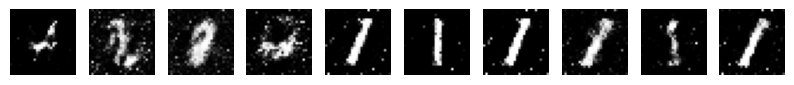

Epoch [32/301], D Loss: 0.3937830558021863, G Loss: 3.0882472063700357
Epoch [33/301], D Loss: 0.43016681482394536, G Loss: 2.871488376458486
Epoch [34/301], D Loss: 0.3981077204147975, G Loss: 3.047486895084381
Epoch [35/301], D Loss: 0.40015142355362576, G Loss: 3.2054172256787616
Epoch [36/301], D Loss: 0.3509211283127467, G Loss: 3.524494701862335
Epoch [37/301], D Loss: 0.29971088483929637, G Loss: 4.066125589052836
Epoch [38/301], D Loss: 0.3667522545059522, G Loss: 3.52226993227005
Epoch [39/301], D Loss: 0.4317008755207062, G Loss: 2.837875256538391
Epoch [40/301], D Loss: 0.466720153927803, G Loss: 2.627608917872111
Epoch [41/301], D Loss: 0.4818377098639806, G Loss: 2.546657318433126
Generator output at epoch 40


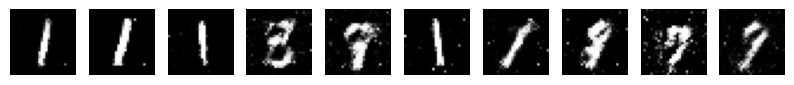

Epoch [42/301], D Loss: 0.5030388179222742, G Loss: 2.528883749961853
Epoch [43/301], D Loss: 0.4836744532982508, G Loss: 2.6252408021291096
Epoch [44/301], D Loss: 0.4796623409986496, G Loss: 2.6188854387601217
Epoch [45/301], D Loss: 0.4970340352455775, G Loss: 2.5544459716478984
Epoch [46/301], D Loss: 0.4763511476119359, G Loss: 2.649134988307953
Epoch [47/301], D Loss: 0.4696088379820188, G Loss: 2.69029510974884
Epoch [48/301], D Loss: 0.46963955330848695, G Loss: 2.715036830743154
Epoch [49/301], D Loss: 0.515153028190136, G Loss: 2.478114784081777
Epoch [50/301], D Loss: 0.5512769243121147, G Loss: 2.2623363067309064
Epoch [51/301], D Loss: 0.5600332763195038, G Loss: 2.1944457915623983
Generator output at epoch 50


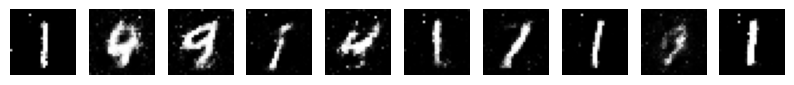

Epoch [52/301], D Loss: 0.5789089495738348, G Loss: 2.1613454988797507
Epoch [53/301], D Loss: 0.578999320268631, G Loss: 2.1760129429499306
Epoch [54/301], D Loss: 0.5632744421958923, G Loss: 2.259272935072581
Epoch [55/301], D Loss: 0.553340085307757, G Loss: 2.2872783417701723
Epoch [56/301], D Loss: 0.5482904009024302, G Loss: 2.3424955445925395
Epoch [57/301], D Loss: 0.5663702425956726, G Loss: 2.30350950829188
Epoch [58/301], D Loss: 0.5646902992725372, G Loss: 2.2817261608441672
Epoch [59/301], D Loss: 0.6013744512001673, G Loss: 2.106853310108185
Epoch [60/301], D Loss: 0.6197274474700292, G Loss: 2.0319118898709614
Epoch [61/301], D Loss: 0.5997702282269796, G Loss: 2.088170562108358
Generator output at epoch 60


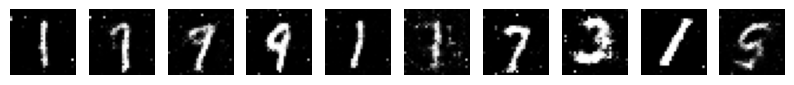

Epoch [62/301], D Loss: 0.6178006450732549, G Loss: 2.0235937434832256
Epoch [63/301], D Loss: 0.6075999282201131, G Loss: 2.0510254623095197
Epoch [64/301], D Loss: 0.6084882032473882, G Loss: 2.091881016890208
Epoch [65/301], D Loss: 0.6034627869129181, G Loss: 2.1101476486523945
Epoch [66/301], D Loss: 0.5926653633117676, G Loss: 2.173192324479421
Epoch [67/301], D Loss: 0.5984457078377405, G Loss: 2.1289969342549644
Epoch [68/301], D Loss: 0.5957477178573608, G Loss: 2.161422037124634
Epoch [69/301], D Loss: 0.6075971143245698, G Loss: 2.1217888944943746
Epoch [70/301], D Loss: 0.6216116003990173, G Loss: 2.073039702574412
Epoch [71/301], D Loss: 0.6307812581459681, G Loss: 2.024898331006368
Generator output at epoch 70


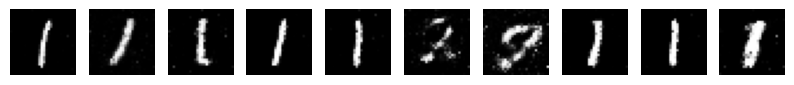

Epoch [72/301], D Loss: 0.6447766298850377, G Loss: 1.9624098399480183
Epoch [73/301], D Loss: 0.6368312015136083, G Loss: 1.9656265093485514
Epoch [74/301], D Loss: 0.6354543270667394, G Loss: 2.007415941397349
Epoch [75/301], D Loss: 0.6572025455236435, G Loss: 1.9323335127830505
Epoch [76/301], D Loss: 0.651303728222847, G Loss: 1.9531708668073018
Epoch [77/301], D Loss: 0.6529708836476008, G Loss: 1.9754928030967713
Epoch [78/301], D Loss: 0.6709517200787862, G Loss: 1.918230885664622
Epoch [79/301], D Loss: 0.6739285235802333, G Loss: 1.9168874905904134
Epoch [80/301], D Loss: 0.6791237123807271, G Loss: 1.8994528574943543
Epoch [81/301], D Loss: 0.6912778514623642, G Loss: 1.8847659947077433
Generator output at epoch 80


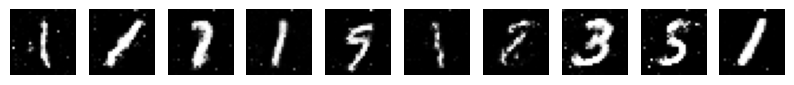

Epoch [82/301], D Loss: 0.6938083936770757, G Loss: 1.84580921236674
Epoch [83/301], D Loss: 0.6933256081342697, G Loss: 1.8485396968523662
Epoch [84/301], D Loss: 0.6904363801876704, G Loss: 1.8684363735516867
Epoch [85/301], D Loss: 0.7046429914633433, G Loss: 1.845833566824595
Epoch [86/301], D Loss: 0.708225147763888, G Loss: 1.807506888071696
Epoch [87/301], D Loss: 0.6962668528556823, G Loss: 1.8538911066055297
Epoch [88/301], D Loss: 0.7070819385846456, G Loss: 1.820750376065572
Epoch [89/301], D Loss: 0.707921891172727, G Loss: 1.7995546754201253
Epoch [90/301], D Loss: 0.7114749384323756, G Loss: 1.7913966671625774
Epoch [91/301], D Loss: 0.7111836558977763, G Loss: 1.8300780553817748
Generator output at epoch 90


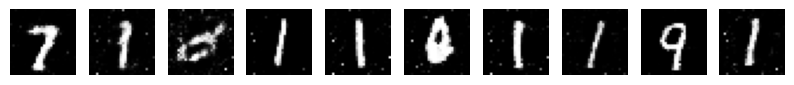

Epoch [92/301], D Loss: 0.7061507407824198, G Loss: 1.831018326918284
Epoch [93/301], D Loss: 0.7066804728110632, G Loss: 1.8195395328203836
Epoch [94/301], D Loss: 0.7145848917961121, G Loss: 1.7854927139282226
Epoch [95/301], D Loss: 0.7239440367221832, G Loss: 1.7707710898717244
Epoch [96/301], D Loss: 0.7112689998149871, G Loss: 1.7937271658579508
Epoch [97/301], D Loss: 0.727505094687144, G Loss: 1.7698539927800496
Epoch [98/301], D Loss: 0.7229372385342916, G Loss: 1.7757911628087362
Epoch [99/301], D Loss: 0.7183832557201385, G Loss: 1.8059747333526612
Epoch [100/301], D Loss: 0.7199919019142786, G Loss: 1.778587870279948
Epoch [101/301], D Loss: 0.7239315778811772, G Loss: 1.7861456858317057
Generator output at epoch 100


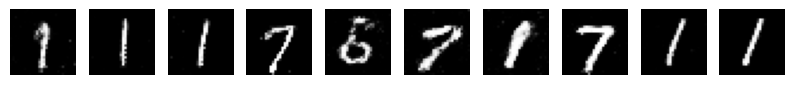

Epoch [102/301], D Loss: 0.7220804931322734, G Loss: 1.787566185792287
Epoch [103/301], D Loss: 0.7233743562698364, G Loss: 1.7922550775210062
Epoch [104/301], D Loss: 0.726564899245898, G Loss: 1.7822452448209127
Epoch [105/301], D Loss: 0.7305591398477554, G Loss: 1.7706704398790996
Epoch [106/301], D Loss: 0.7244028411308925, G Loss: 1.7622115591367087
Epoch [107/301], D Loss: 0.7263909875949224, G Loss: 1.762202639579773
Epoch [108/301], D Loss: 0.7300890684127808, G Loss: 1.7546623266537984
Epoch [109/301], D Loss: 0.7227932693163553, G Loss: 1.7704457346598308
Epoch [110/301], D Loss: 0.7251194619735082, G Loss: 1.7597054017384848
Epoch [111/301], D Loss: 0.7214190828402837, G Loss: 1.7675752013524373
Generator output at epoch 110


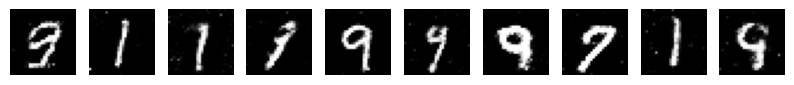

Epoch [112/301], D Loss: 0.7243891152143478, G Loss: 1.7689501657485962
Epoch [113/301], D Loss: 0.7271270544926326, G Loss: 1.772787019252777
Epoch [114/301], D Loss: 0.7221207504669825, G Loss: 1.7727609632809957
Epoch [115/301], D Loss: 0.7233625857830047, G Loss: 1.7835756560961404
Epoch [116/301], D Loss: 0.7246575351556143, G Loss: 1.7600272523562113
Epoch [117/301], D Loss: 0.7225127613544464, G Loss: 1.7893826341629029
Epoch [118/301], D Loss: 0.7272357875108719, G Loss: 1.7568237849871318
Epoch [119/301], D Loss: 0.7246664973100027, G Loss: 1.7598310974438984
Epoch [120/301], D Loss: 0.7212773423194885, G Loss: 1.7725727063814798
Epoch [121/301], D Loss: 0.7213412878513337, G Loss: 1.7792289816538494
Generator output at epoch 120


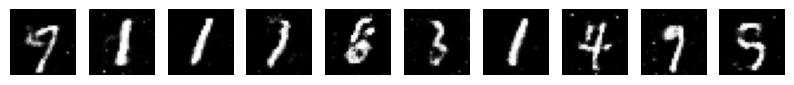

Epoch [122/301], D Loss: 0.7269370481173197, G Loss: 1.7606025541623433
Epoch [123/301], D Loss: 0.7195317710240682, G Loss: 1.7695955829620362
Epoch [124/301], D Loss: 0.7239596095879872, G Loss: 1.7589659946759542
Epoch [125/301], D Loss: 0.7226868903636933, G Loss: 1.7865592810312907
Epoch [126/301], D Loss: 0.7197146387894948, G Loss: 1.7851518524487813
Epoch [127/301], D Loss: 0.7254920006195704, G Loss: 1.7692268082300822
Epoch [128/301], D Loss: 0.7198058740695318, G Loss: 1.7867519699732461
Epoch [129/301], D Loss: 0.7220593849817912, G Loss: 1.7679088072776794
Epoch [130/301], D Loss: 0.7213116214672725, G Loss: 1.7889918494224548
Epoch [131/301], D Loss: 0.7159290848573049, G Loss: 1.774489278157552
Generator output at epoch 130


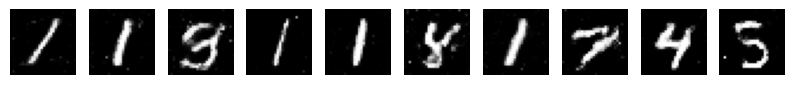

Epoch [132/301], D Loss: 0.7203384540081024, G Loss: 1.7672041449546814
Epoch [133/301], D Loss: 0.7185544365644455, G Loss: 1.7730764552752176
Epoch [134/301], D Loss: 0.7164065631628036, G Loss: 1.7898562183380127
Epoch [135/301], D Loss: 0.7133082619905472, G Loss: 1.789243465423584
Epoch [136/301], D Loss: 0.7090335154136022, G Loss: 1.797468868891398
Epoch [137/301], D Loss: 0.711666143655777, G Loss: 1.7928367416063944
Epoch [138/301], D Loss: 0.7109839275280635, G Loss: 1.7947279295921326
Epoch [139/301], D Loss: 0.7114554889599483, G Loss: 1.778296941757202
Epoch [140/301], D Loss: 0.7068843710422515, G Loss: 1.7910216822624208
Epoch [141/301], D Loss: 0.7063960284789403, G Loss: 1.807015263080597
Generator output at epoch 140


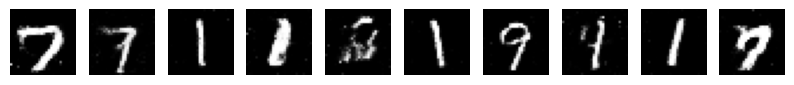

Epoch [142/301], D Loss: 0.7069864311218261, G Loss: 1.802420903523763
Epoch [143/301], D Loss: 0.7058217277526856, G Loss: 1.7946565709114075
Epoch [144/301], D Loss: 0.7035142908096313, G Loss: 1.8085460131168365
Epoch [145/301], D Loss: 0.6999430425961812, G Loss: 1.7989101489384969
Epoch [146/301], D Loss: 0.6992630630334218, G Loss: 1.8098801032702128
Epoch [147/301], D Loss: 0.7003957246939341, G Loss: 1.8197910981178285
Epoch [148/301], D Loss: 0.6985853622357051, G Loss: 1.81952614402771
Epoch [149/301], D Loss: 0.7015100254217783, G Loss: 1.8190532061258953
Epoch [150/301], D Loss: 0.6961266462405523, G Loss: 1.8235007406870525
Epoch [151/301], D Loss: 0.6922133256991704, G Loss: 1.832712777296702
Generator output at epoch 150


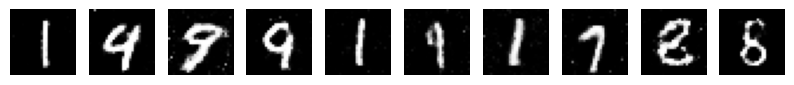

Epoch [152/301], D Loss: 0.6960333807865778, G Loss: 1.8318744991620382
Epoch [153/301], D Loss: 0.6919738352696101, G Loss: 1.8324934102694193
Epoch [154/301], D Loss: 0.6892330756187439, G Loss: 1.8388423968950907
Epoch [155/301], D Loss: 0.6929964606761932, G Loss: 1.8379121108055114
Epoch [156/301], D Loss: 0.6862316924333572, G Loss: 1.840825736204783
Epoch [157/301], D Loss: 0.6848406647443771, G Loss: 1.8392447247505188
Epoch [158/301], D Loss: 0.6787668770154317, G Loss: 1.861076376914978
Epoch [159/301], D Loss: 0.6809673635164897, G Loss: 1.8545214411417643
Epoch [160/301], D Loss: 0.6806217004855474, G Loss: 1.8463757077852885
Epoch [161/301], D Loss: 0.67771477663517, G Loss: 1.8671193633079528
Generator output at epoch 160


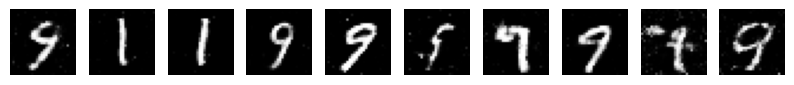

Epoch [162/301], D Loss: 0.678041228612264, G Loss: 1.8701725268363953
Epoch [163/301], D Loss: 0.6754515132109324, G Loss: 1.8680161450703938
Epoch [164/301], D Loss: 0.6777572333017985, G Loss: 1.8545640002886454
Epoch [165/301], D Loss: 0.6684099050760269, G Loss: 1.86671893119812
Epoch [166/301], D Loss: 0.6703404575188955, G Loss: 1.864343585173289
Epoch [167/301], D Loss: 0.6653815858364105, G Loss: 1.8870966730117797
Epoch [168/301], D Loss: 0.6629448874394099, G Loss: 1.8836860620180766
Epoch [169/301], D Loss: 0.6663778302272161, G Loss: 1.8932843976020812
Epoch [170/301], D Loss: 0.6641011586586635, G Loss: 1.8903360749880473
Epoch [171/301], D Loss: 0.6580638719399771, G Loss: 1.9019110458691915
Generator output at epoch 170


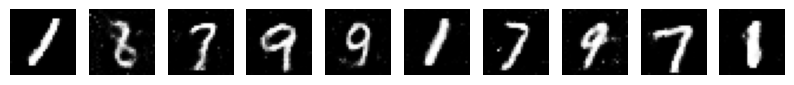

Epoch [172/301], D Loss: 0.6594371823469798, G Loss: 1.8872579270998637
Epoch [173/301], D Loss: 0.6568491020202637, G Loss: 1.9027494948705037
Epoch [174/301], D Loss: 0.658270174185435, G Loss: 1.894339218934377
Epoch [175/301], D Loss: 0.6523339101870854, G Loss: 1.917384345372518
Epoch [176/301], D Loss: 0.6533931949536006, G Loss: 1.922710924466451
Epoch [177/301], D Loss: 0.6559025923411052, G Loss: 1.9320909075737
Epoch [178/301], D Loss: 0.6514428481260935, G Loss: 1.9244047048886617
Epoch [179/301], D Loss: 0.6472540091673533, G Loss: 1.928017895380656
Epoch [180/301], D Loss: 0.6400615747769673, G Loss: 1.940941546758016
Epoch [181/301], D Loss: 0.6430480480194092, G Loss: 1.930021016438802
Generator output at epoch 180


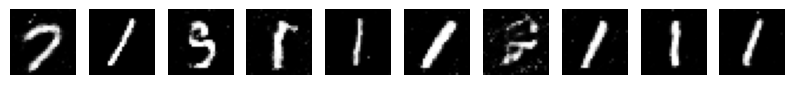

Epoch [182/301], D Loss: 0.6408510266542434, G Loss: 1.9393554813067118
Epoch [183/301], D Loss: 0.6340050592025122, G Loss: 1.9519702310562135
Epoch [184/301], D Loss: 0.6333538307746251, G Loss: 1.938044848759969
Epoch [185/301], D Loss: 0.6327292879025141, G Loss: 1.9618692943255107
Epoch [186/301], D Loss: 0.6296431846221288, G Loss: 1.945860647201538
Epoch [187/301], D Loss: 0.6278122509320577, G Loss: 1.963985315322876
Epoch [188/301], D Loss: 0.6279237231413524, G Loss: 1.9707933891614278
Epoch [189/301], D Loss: 0.6211156704425812, G Loss: 1.9570621746381125
Epoch [190/301], D Loss: 0.6249839137395223, G Loss: 1.9775397408803304
Epoch [191/301], D Loss: 0.6174854888121287, G Loss: 1.9665050803820292
Generator output at epoch 190


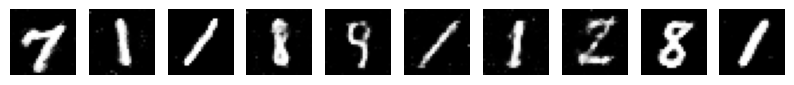

Epoch [192/301], D Loss: 0.6204164833227793, G Loss: 1.9910403218269348
Epoch [193/301], D Loss: 0.6203845941623052, G Loss: 2.007011445681254
Epoch [194/301], D Loss: 0.6136210006475449, G Loss: 1.9855844504038493
Epoch [195/301], D Loss: 0.6125157763560612, G Loss: 2.008560990492503
Epoch [196/301], D Loss: 0.6114826160271962, G Loss: 2.002191339015961
Epoch [197/301], D Loss: 0.6057997162342071, G Loss: 2.022551742553711
Epoch [198/301], D Loss: 0.6054903829097747, G Loss: 2.0085881136258443
Epoch [199/301], D Loss: 0.6022264638344447, G Loss: 2.017794206619263
Epoch [200/301], D Loss: 0.6028818979263305, G Loss: 2.0234981134732566
Epoch [201/301], D Loss: 0.5978438173532485, G Loss: 2.030452637672424
Generator output at epoch 200


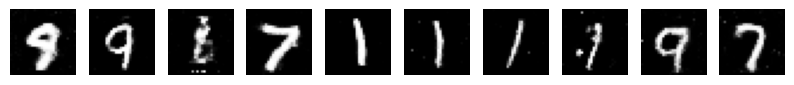

Epoch [202/301], D Loss: 0.5989812967379888, G Loss: 2.042225326061249
Epoch [203/301], D Loss: 0.5925177678267161, G Loss: 2.028333016872406
Epoch [204/301], D Loss: 0.5886149728695551, G Loss: 2.0573004433314006
Epoch [205/301], D Loss: 0.5894931860764822, G Loss: 2.049718077659607
Epoch [206/301], D Loss: 0.5931973328987757, G Loss: 2.065652403990428
Epoch [207/301], D Loss: 0.5875680940945943, G Loss: 2.06097816546758
Epoch [208/301], D Loss: 0.5815944612423579, G Loss: 2.064284550825755
Epoch [209/301], D Loss: 0.5852283696730931, G Loss: 2.070850483417511
Epoch [210/301], D Loss: 0.5778909253676733, G Loss: 2.0713685897191367
Epoch [211/301], D Loss: 0.5802376978397369, G Loss: 2.0781725079218547
Generator output at epoch 210


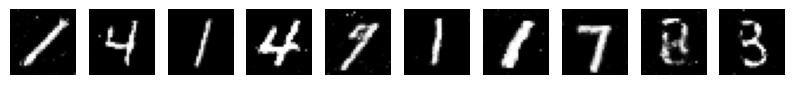

Epoch [212/301], D Loss: 0.5788100840648015, G Loss: 2.0934293740590415
Epoch [213/301], D Loss: 0.5727483423948287, G Loss: 2.0980214629173277
Epoch [214/301], D Loss: 0.5716959873835246, G Loss: 2.1018293476104737
Epoch [215/301], D Loss: 0.5702544858853023, G Loss: 2.1055451571146646
Epoch [216/301], D Loss: 0.5695035760800043, G Loss: 2.093914901415507
Epoch [217/301], D Loss: 0.5630112841129303, G Loss: 2.1006537896792095
Epoch [218/301], D Loss: 0.5629664750496547, G Loss: 2.112804572582245
Epoch [219/301], D Loss: 0.5648917299906413, G Loss: 2.117495951016744
Epoch [220/301], D Loss: 0.5594944389661153, G Loss: 2.123022155602773
Epoch [221/301], D Loss: 0.5616598946650823, G Loss: 2.1324548242886863
Generator output at epoch 220


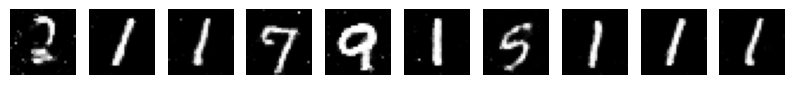

Epoch [222/301], D Loss: 0.5548700523376465, G Loss: 2.1381492592493694
Epoch [223/301], D Loss: 0.5559470377763113, G Loss: 2.138789563179016
Epoch [224/301], D Loss: 0.5498429654439291, G Loss: 2.142125880877177
Epoch [225/301], D Loss: 0.5471119308869044, G Loss: 2.1602484806378683
Epoch [226/301], D Loss: 0.5457736935615539, G Loss: 2.1483179955482483
Epoch [227/301], D Loss: 0.5468037644227346, G Loss: 2.164350146929423
Epoch [228/301], D Loss: 0.538548172156016, G Loss: 2.1788349917729697
Epoch [229/301], D Loss: 0.5417857443094254, G Loss: 2.1637069300015765
Epoch [230/301], D Loss: 0.5423154400984446, G Loss: 2.180207770506541
Epoch [231/301], D Loss: 0.5388289728562037, G Loss: 2.195996417204539
Generator output at epoch 230


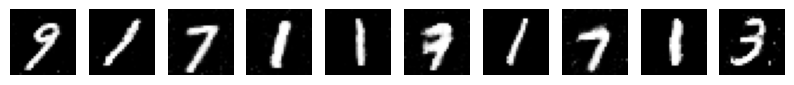

Epoch [232/301], D Loss: 0.5310719055334727, G Loss: 2.181929497559865
Epoch [233/301], D Loss: 0.5323423356215159, G Loss: 2.1918831203778586
Epoch [234/301], D Loss: 0.5311669905583064, G Loss: 2.2045754731496174
Epoch [235/301], D Loss: 0.5315693467855453, G Loss: 2.202982340653737
Epoch [236/301], D Loss: 0.5265172464847565, G Loss: 2.1921344685554502
Epoch [237/301], D Loss: 0.5292385631004969, G Loss: 2.2156327476501465
Epoch [238/301], D Loss: 0.5203646994034449, G Loss: 2.233679412206014
Epoch [239/301], D Loss: 0.5177070201635361, G Loss: 2.2442269570032756
Epoch [240/301], D Loss: 0.5278527328173319, G Loss: 2.2247632077534996
Epoch [241/301], D Loss: 0.5175729607343673, G Loss: 2.2333011255264283
Generator output at epoch 240


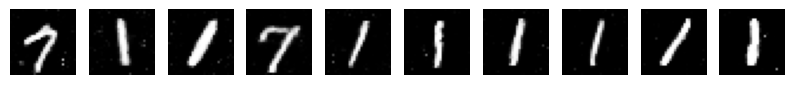

Epoch [242/301], D Loss: 0.5198442171017329, G Loss: 2.229516436735789
Epoch [243/301], D Loss: 0.514024472951889, G Loss: 2.2533865942955016
Epoch [244/301], D Loss: 0.5133885760704676, G Loss: 2.244380147775014
Epoch [245/301], D Loss: 0.5138115731080373, G Loss: 2.2518868312835694
Epoch [246/301], D Loss: 0.5092604743639628, G Loss: 2.2572900899251302
Epoch [247/301], D Loss: 0.507794072429339, G Loss: 2.2676982305844624
Epoch [248/301], D Loss: 0.505636933485667, G Loss: 2.2723388047218323
Epoch [249/301], D Loss: 0.5022609332799911, G Loss: 2.27748357184728
Epoch [250/301], D Loss: 0.5039335827032725, G Loss: 2.279235955397288
Epoch [251/301], D Loss: 0.5020965308348337, G Loss: 2.280570166428884
Generator output at epoch 250


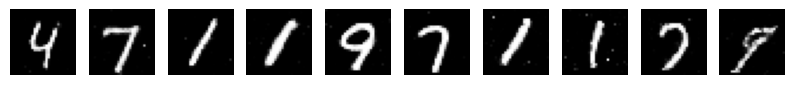

Epoch [252/301], D Loss: 0.49676856815814974, G Loss: 2.300360206604004
Epoch [253/301], D Loss: 0.49962843000888824, G Loss: 2.2979472818374633
Epoch [254/301], D Loss: 0.4931841468413671, G Loss: 2.3071478107770282
Epoch [255/301], D Loss: 0.4894441969792048, G Loss: 2.307951613903046
Epoch [256/301], D Loss: 0.49305358866850535, G Loss: 2.3165594035784403
Epoch [257/301], D Loss: 0.4920379390716553, G Loss: 2.3166397363344826
Epoch [258/301], D Loss: 0.48226190769672395, G Loss: 2.317825400352478
Epoch [259/301], D Loss: 0.48377021483580274, G Loss: 2.3278580174446106
Epoch [260/301], D Loss: 0.4833998063405355, G Loss: 2.3544133706092834
Epoch [261/301], D Loss: 0.4850907129049301, G Loss: 2.34661785252889
Generator output at epoch 260


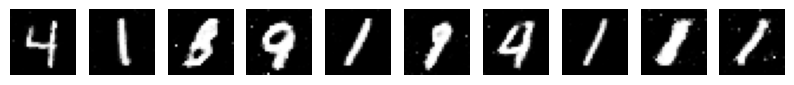

Epoch [262/301], D Loss: 0.48226117459932966, G Loss: 2.3338905558586123
Epoch [263/301], D Loss: 0.48238245445489886, G Loss: 2.343910758336385
Epoch [264/301], D Loss: 0.4802480481863022, G Loss: 2.349700904687246
Epoch [265/301], D Loss: 0.475888840119044, G Loss: 2.3648908371925352
Epoch [266/301], D Loss: 0.4762180359363556, G Loss: 2.3729933001200356
Epoch [267/301], D Loss: 0.4755830096801122, G Loss: 2.3706150771776837
Epoch [268/301], D Loss: 0.46525732374191286, G Loss: 2.3732658173243206
Epoch [269/301], D Loss: 0.46896806033452354, G Loss: 2.3890240446726483
Epoch [270/301], D Loss: 0.46556794120868045, G Loss: 2.3996604164441426
Epoch [271/301], D Loss: 0.46166773386796317, G Loss: 2.4073685437838237
Generator output at epoch 270


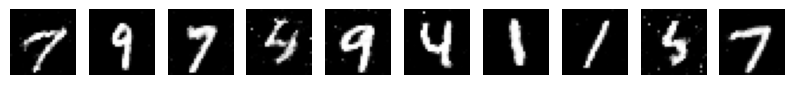

Epoch [272/301], D Loss: 0.46575544476509095, G Loss: 2.3939845287005106
Epoch [273/301], D Loss: 0.4645955039858818, G Loss: 2.404976378440857
Epoch [274/301], D Loss: 0.46349295957883196, G Loss: 2.4108377747535705
Epoch [275/301], D Loss: 0.4600745868682861, G Loss: 2.4117503339449566
Epoch [276/301], D Loss: 0.4593769674698512, G Loss: 2.417698315779368
Epoch [277/301], D Loss: 0.45372123754024507, G Loss: 2.4056067743301393
Epoch [278/301], D Loss: 0.45923860041300457, G Loss: 2.4293523739178977
Epoch [279/301], D Loss: 0.4538355738917987, G Loss: 2.4336276497840883
Epoch [280/301], D Loss: 0.4525185030301412, G Loss: 2.432940883318583
Epoch [281/301], D Loss: 0.4480399328072866, G Loss: 2.44654624859492
Generator output at epoch 280


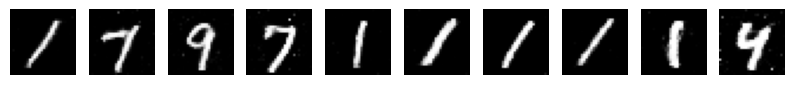

Epoch [282/301], D Loss: 0.45290552435318626, G Loss: 2.4561160039901733
Epoch [283/301], D Loss: 0.44602244327465695, G Loss: 2.437645219643911
Epoch [284/301], D Loss: 0.4510002600153287, G Loss: 2.455017203648885
Epoch [285/301], D Loss: 0.4459298986792564, G Loss: 2.455623308181763
Epoch [286/301], D Loss: 0.4405545480251312, G Loss: 2.4652868693669636
Epoch [287/301], D Loss: 0.4383733762105306, G Loss: 2.4722240149180092
Epoch [288/301], D Loss: 0.43715842719872794, G Loss: 2.4603507595062255
Epoch [289/301], D Loss: 0.43793489821751913, G Loss: 2.477883950392405
Epoch [290/301], D Loss: 0.43617911316951113, G Loss: 2.4846741199493407
Epoch [291/301], D Loss: 0.4322111204266548, G Loss: 2.498635869661967
Generator output at epoch 290


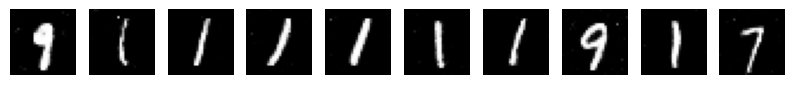

Epoch [292/301], D Loss: 0.4318306956887245, G Loss: 2.506433205127716
Epoch [293/301], D Loss: 0.4352457840442657, G Loss: 2.5085006815592448
Epoch [294/301], D Loss: 0.42877500102917354, G Loss: 2.5114384961128233
Epoch [295/301], D Loss: 0.4284894230167071, G Loss: 2.5146391326586404
Epoch [296/301], D Loss: 0.42066584680477775, G Loss: 2.5174419967333477
Epoch [297/301], D Loss: 0.419542598982652, G Loss: 2.5302944731712342
Epoch [298/301], D Loss: 0.4220137078166008, G Loss: 2.538848872025808
Epoch [299/301], D Loss: 0.4212051263252894, G Loss: 2.536911570549011
Epoch [300/301], D Loss: 0.42030268851916, G Loss: 2.540202724615733
Epoch [301/301], D Loss: 0.42201966847976047, G Loss: 2.5396426056226096
Generator output at epoch 300


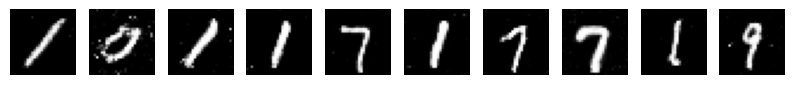

In [14]:
class Generator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        return x

class Discriminator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# Check for GPU
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
z_dim = 100
hidden_size = 512
image_size = 28 * 28
lr = 0.0001
num_epochs = 301

# Initialize generator and discriminator
G = Generator(z_dim, hidden_size, image_size).to(device)
D = Discriminator(image_size, hidden_size, 1).to(device)

# Loss and optimizers
criterion = nn.BCELoss()
G_optimizer = torch.optim.Adam(G.parameters(), lr=lr)
D_optimizer = torch.optim.Adam(D.parameters(), lr=lr)

# Training loop
# Lists to store losses
D_losses = []
G_losses = []

for epoch in range(num_epochs):
    D_epoch_loss = 0.0
    G_epoch_loss = 0.0
    for batch_idx, (real_images, _) in enumerate(train_loader):
        batch_size = real_images.size(0)
        real_images = real_images.view(batch_size, -1).to(device)

        # Labels for real and fake data
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # Train Discriminator
        D_optimizer.zero_grad()
        outputs = D(real_images)
        D_real_loss = criterion(outputs, real_labels)

        z = torch.randn(batch_size, z_dim).to(device)
        fake_images = G(z)
        outputs = D(fake_images.detach())
        D_fake_loss = criterion(outputs, fake_labels)

        D_loss = D_real_loss + D_fake_loss
        D_loss.backward()
        D_optimizer.step()

        # Train Generator
        G_optimizer.zero_grad()
        z = torch.randn(batch_size, z_dim).to(device)
        fake_images = G(z)
        outputs = D(fake_images)
        G_loss = criterion(outputs, real_labels)

        G_loss.backward()
        G_optimizer.step()

        D_epoch_loss += D_loss.item()
        G_epoch_loss += G_loss.item()

    D_losses.append(D_epoch_loss / len(train_loader))
    G_losses.append(G_epoch_loss / len(train_loader))

    print(f'Epoch [{epoch+1}/{num_epochs}], D Loss: {D_losses[-1]}, G Loss: {G_losses[-1]}')
    
    if epoch % 10 == 0:
        print(f'Generator output at epoch {epoch}')
        visualize_generator_output(G, z_dim,device=device)

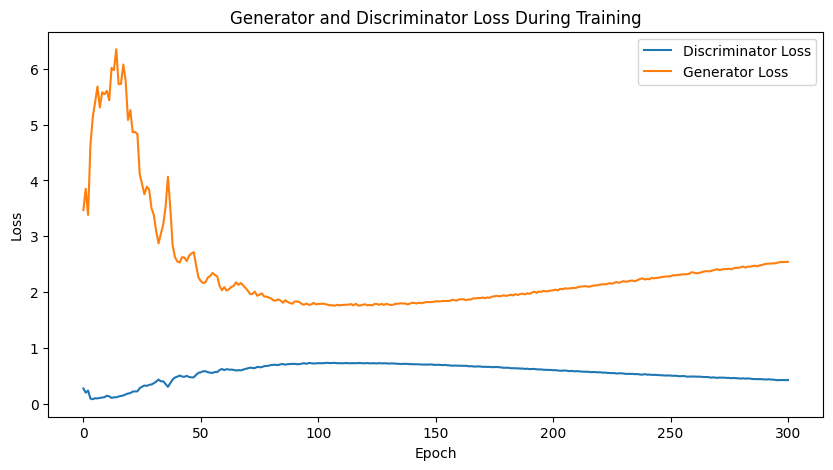

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(D_losses, label='Discriminator Loss')
plt.plot(G_losses, label='Generator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Generator and Discriminator Loss During Training')
plt.show()

Generator Loss: 2.528513527931051
Discriminator Loss: 0.9104138758588345


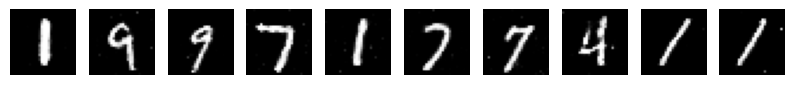

In [31]:
def evaluate_model(G, D, test_loader, criterion, device):
    G.eval()
    D.eval()
    
    G_loss = 0.0
    D_loss = 0.0
    with torch.no_grad():
        for batch_idx, (real_images, _) in enumerate(test_loader):
            batch_size = real_images.size(0)
            real_images = real_images.view(batch_size, -1).to(device)

            # Labels for real and fake data
            real_labels = torch.ones(batch_size, 1).to(device)
            fake_labels = torch.zeros(batch_size, 1).to(device)

            # Evaluate Discriminator
            outputs = D(real_images)
            D_real_loss = criterion(outputs, real_labels)

            z = torch.randn(batch_size, z_dim).to(device)
            fake_images = G(z)
            outputs = D(fake_images)
            D_fake_loss = criterion(outputs, fake_labels)

            D_loss += (D_real_loss + D_fake_loss).item()

            # Evaluate Generator
            outputs = D(fake_images)
            G_loss += criterion(outputs, real_labels).item()

    G_loss /= len(test_loader)
    D_loss /= len(test_loader)
    
    print(f'Generator Loss: {G_loss}')
    print(f'Discriminator Loss: {D_loss}')

    # Visualize some generated images
    visualize_generator_output(G, z_dim, device,num_images=10)

# Evaluate the model
evaluate_model(G, D, test_loader, criterion, device)

# 1.2

In [10]:
# Define the transformations for the CIFAR-10 dataset
cifar_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 64

# Load the CIFAR-10 dataset
cifar_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=cifar_transform)

# Split the dataset into train, validation, and test sets
cifar_train_size = int(0.8 * len(cifar_data))
cifar_val_size = int(0.1 * len(cifar_data))
cifar_test_size = len(cifar_data) - cifar_train_size - cifar_val_size

cifar_train_data, cifar_val_data, cifar_test_data = random_split(cifar_data, [cifar_train_size, cifar_val_size, cifar_test_size])

# Create dataloaders for each set
cifar_train_loader = DataLoader(cifar_train_data, batch_size=batch_size, shuffle=True)
cifar_val_loader = DataLoader(cifar_val_data, batch_size=batch_size, shuffle=False)
cifar_test_loader = DataLoader(cifar_test_data, batch_size=batch_size, shuffle=False)

# Print the sizes of each set
print(f'CIFAR-10 Train set size: {len(cifar_train_data)}')
print(f'CIFAR-10 Validation set size: {len(cifar_val_data)}')
print(f'CIFAR-10 Test set size: {len(cifar_test_data)}')

Files already downloaded and verified
CIFAR-10 Train set size: 40000
CIFAR-10 Validation set size: 5000
CIFAR-10 Test set size: 5000


In [6]:
def visualize_generator_output(G, z_dim, device, num_images=10):
    # Generate random noise
    z = torch.randn(num_images, z_dim, 1, 1).to(device)  # Reshape to 4D tensor
    
    # Generate fake images
    fake_images = G(z)
    
    # Reshape fake images to 64x64
    fake_images = fake_images.view(fake_images.size(0), 3, 64, 64).cpu().detach().numpy()
    
    # Plot the fake images
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(np.transpose(fake_images[i], (1, 2, 0)) * 0.5 + 0.5)  # Rescale to [0, 1] and transpose to (H, W, C)
        plt.axis('off')
    plt.show()

In [17]:
class DCGAN_Generator(nn.Module):
    def __init__(self, z_dim, img_channels, feature_g):
        super(DCGAN_Generator, self).__init__()
        self.gen = nn.Sequential(
            # Input: N x z_dim x 1 x 1
            nn.ConvTranspose2d(z_dim, feature_g * 16, kernel_size=4, stride=1, padding=0),
            nn.BatchNorm2d(feature_g * 16),
            nn.ReLU(True),
            # State: N x (feature_g*16) x 4 x 4

            nn.ConvTranspose2d(feature_g * 16, feature_g * 8, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(feature_g * 8),
            nn.ReLU(True),
            # State: N x (feature_g*8) x 8 x 8

            nn.ConvTranspose2d(feature_g * 8, feature_g * 4, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(feature_g * 4),
            nn.ReLU(True),
            # State: N x (feature_g*4) x 16 x 16

            nn.ConvTranspose2d(feature_g * 4, feature_g * 2, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(feature_g * 2),
            nn.ReLU(True),
            # State: N x (feature_g*2) x 32 x 32

            nn.ConvTranspose2d(feature_g * 2, img_channels, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
            # Output: N x img_channels x 64 x 64
        )

    def forward(self, x):
        return self.gen(x)

class DCGAN_Discriminator(nn.Module):
    def __init__(self, img_channels, feature_d):
        super(DCGAN_Discriminator, self).__init__()
        self.disc = nn.Sequential(
            # Input: N x img_channels x 64 x 64
            nn.Conv2d(img_channels, feature_d, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            # State: N x feature_d x 32 x 32

            nn.Conv2d(feature_d, feature_d * 2, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(feature_d * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # State: N x (feature_d*2) x 16 x 16

            nn.Conv2d(feature_d * 2, feature_d * 4, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(feature_d * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # State: N x (feature_d*4) x 8 x 8

            nn.Conv2d(feature_d * 4, feature_d * 8, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(feature_d * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # State: N x (feature_d*8) x 4 x 4

            nn.Conv2d(feature_d * 8, 1, kernel_size=4, stride=1, padding=0),
            nn.Sigmoid()
            # Output: N x 1 x 1 x 1
        )

    def forward(self, x):
        return self.disc(x).view(-1, 1).squeeze(1)

Epoch [1/50], D Loss: 0.8010025614514947, G Loss: 4.338985858345032
Generator output at epoch 0


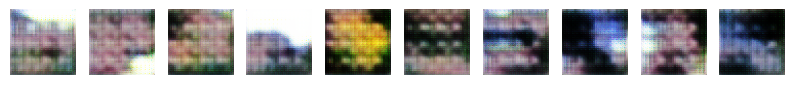

Epoch [2/50], D Loss: 0.7034673568159342, G Loss: 4.0223060105085375
Epoch [3/50], D Loss: 0.717138777244091, G Loss: 4.164704557991028
Epoch [4/50], D Loss: 0.7644664269804955, G Loss: 3.7025788201332093
Epoch [5/50], D Loss: 0.7223636254072189, G Loss: 3.600082912182808
Epoch [6/50], D Loss: 0.634223934879899, G Loss: 4.033877084597945
Epoch [7/50], D Loss: 0.576312485653162, G Loss: 4.214826022148133
Epoch [8/50], D Loss: 0.4586098193705082, G Loss: 4.423120840668679
Epoch [9/50], D Loss: 0.44800250541567804, G Loss: 4.638165812450647
Epoch [10/50], D Loss: 0.5077090215474367, G Loss: 4.416590602970123
Epoch [11/50], D Loss: 0.5228783120378852, G Loss: 4.252963433328271
Generator output at epoch 10


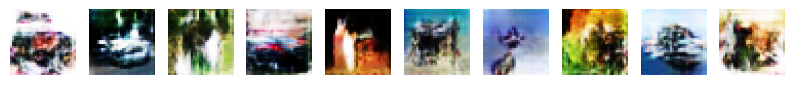

Epoch [12/50], D Loss: 0.4196810248315334, G Loss: 4.641618565273285
Epoch [13/50], D Loss: 0.4062961608186364, G Loss: 4.439688457876444
Epoch [14/50], D Loss: 0.5708282789885998, G Loss: 4.148628245774656
Epoch [15/50], D Loss: 0.3242195716202259, G Loss: 4.797838065445423
Epoch [16/50], D Loss: 0.36114412507861854, G Loss: 4.695142495441437
Epoch [17/50], D Loss: 0.44385701096504926, G Loss: 4.5272118895411495
Epoch [18/50], D Loss: 0.3829198420226574, G Loss: 4.817165993911028
Epoch [19/50], D Loss: 0.3963201976582408, G Loss: 4.270076842975617
Epoch [20/50], D Loss: 0.3196176984257996, G Loss: 4.6828272841706875
Epoch [21/50], D Loss: 0.3365022024605423, G Loss: 5.058672631907463
Generator output at epoch 20


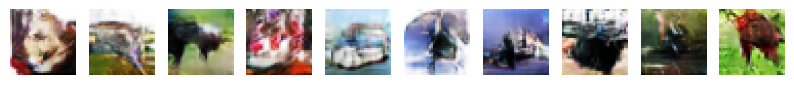

Epoch [22/50], D Loss: 0.36835811535418034, G Loss: 4.462460342632607
Epoch [23/50], D Loss: 0.4476353916749358, G Loss: 4.5777455286026
Epoch [24/50], D Loss: 0.26851573974490167, G Loss: 4.638144868326187
Epoch [25/50], D Loss: 0.29260569235011935, G Loss: 4.946679970502854
Epoch [26/50], D Loss: 0.34072325676456094, G Loss: 4.912255386006832
Epoch [27/50], D Loss: 0.2816917610235512, G Loss: 5.255611867070198
Epoch [28/50], D Loss: 0.41234035638794303, G Loss: 5.0796975548744205
Epoch [29/50], D Loss: 0.2567518243961036, G Loss: 4.8016623711586
Epoch [30/50], D Loss: 0.3698118196301162, G Loss: 4.559394323429466
Epoch [31/50], D Loss: 0.6317189087700099, G Loss: 4.571868894264932
Generator output at epoch 30


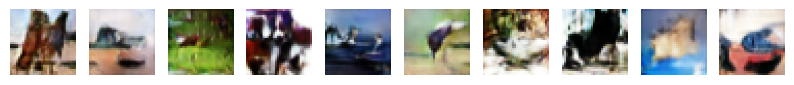

Epoch [32/50], D Loss: 0.22416433163061739, G Loss: 5.186729055228829
Epoch [33/50], D Loss: 0.3537475909352303, G Loss: 4.751310035705567
Epoch [34/50], D Loss: 0.36294339146465066, G Loss: 4.653528603506088
Epoch [35/50], D Loss: 0.24526232262700795, G Loss: 4.983717191171646
Epoch [36/50], D Loss: 0.2969226064130664, G Loss: 4.884371143043041
Epoch [37/50], D Loss: 0.3001844067260623, G Loss: 5.53615047672987
Epoch [38/50], D Loss: 0.22985101680271328, G Loss: 5.040921698370576
Epoch [39/50], D Loss: 0.26061036369502544, G Loss: 5.1942884453773495
Epoch [40/50], D Loss: 0.38132492980137467, G Loss: 5.016376014000177
Epoch [41/50], D Loss: 0.2760850352935493, G Loss: 4.945618664598465
Generator output at epoch 40


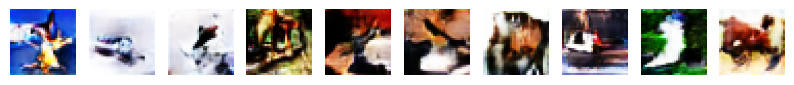

Epoch [42/50], D Loss: 0.411889155196026, G Loss: 4.996593194252974
Epoch [43/50], D Loss: 0.24262617584727705, G Loss: 5.333138819122315
Epoch [44/50], D Loss: 0.36167230164036157, G Loss: 4.761586650305986
Epoch [45/50], D Loss: 0.27728847117871047, G Loss: 4.945905430698395
Epoch [46/50], D Loss: 0.2778747641183436, G Loss: 5.070752251195907
Epoch [47/50], D Loss: 0.23826207656152545, G Loss: 5.076309613418579
Epoch [48/50], D Loss: 0.22424479723136173, G Loss: 6.548243635892868
Epoch [49/50], D Loss: 0.21811714130230248, G Loss: 5.395472764420509
Epoch [50/50], D Loss: 0.2747926188245416, G Loss: 5.316741730546951


In [19]:


# Hyperparameters
z_dim = 512
img_channels = 3
feature_g = 64
feature_d = 64 ## reduced the number of features to solve gradient vanishing problem


lr = 1e-3
num_epochs = 50

# Initialize generator and discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
G = DCGAN_Generator(z_dim, img_channels, feature_g).to(device)
D = DCGAN_Discriminator(img_channels, feature_d).to(device)

# Loss and optimizers
criterion = nn.BCELoss()
G_optimizer = torch.optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999))
D_optimizer = torch.optim.Adam(D.parameters(), lr=lr, betas=(0.5, 0.999))

# Training loop
D_losses = []
G_losses = []

for epoch in range(num_epochs):
    D_epoch_loss = 0.0
    G_epoch_loss = 0.0
    for batch_idx, (real_images, _) in enumerate(cifar_train_loader):
        real_images = real_images.to(device)
        real_images = real_images.to(device)
        real_images = F.interpolate(real_images, size=(64, 64))  # Resize real images to 64x64

        real_labels = torch.ones(batch_size, 1).to(device).view(-1)
        fake_labels = torch.zeros(batch_size, 1).to(device).view(-1)
        fake_labels = torch.zeros(batch_size, 1).to(device).view(-1)

        # Train Discriminator
        D_optimizer.zero_grad()
        outputs = D(real_images)
        D_real_loss = criterion(outputs, real_labels)
        z = torch.randn(batch_size, z_dim, 1, 1).to(device)
        z = torch.randn(batch_size, z_dim, 1, 1).to(device)
        fake_images = G(z)
        outputs = D(fake_images.detach())
        D_fake_loss = criterion(outputs, fake_labels)

        D_loss = D_real_loss + D_fake_loss
        D_loss.backward()
        D_optimizer.step()

        # Train Generator
        G_optimizer.zero_grad()
        z = torch.randn(batch_size, z_dim, 1, 1).to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
        fake_images = G(z)
        outputs = D(fake_images)
        G_loss = criterion(outputs, real_labels)

        G_loss.backward()
        G_optimizer.step()

        D_epoch_loss += D_loss.item()
        G_epoch_loss += G_loss.item()

    D_losses.append(D_epoch_loss / len(cifar_train_loader))
    G_losses.append(G_epoch_loss / len(cifar_train_loader))

    print(f'Epoch [{epoch+1}/{num_epochs}], D Loss: {D_losses[-1]}, G Loss: {G_losses[-1]}')
    
    if epoch % 10 == 0:
        print(f'Generator output at epoch {epoch}')
        visualize_generator_output(G, z_dim,device=device)

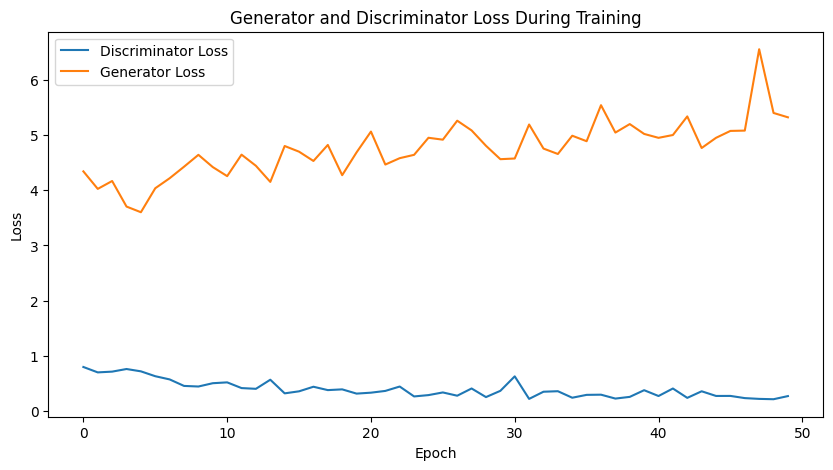

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(D_losses, label='Discriminator Loss')
plt.plot(G_losses, label='Generator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Generator and Discriminator Loss During Training')
plt.show()

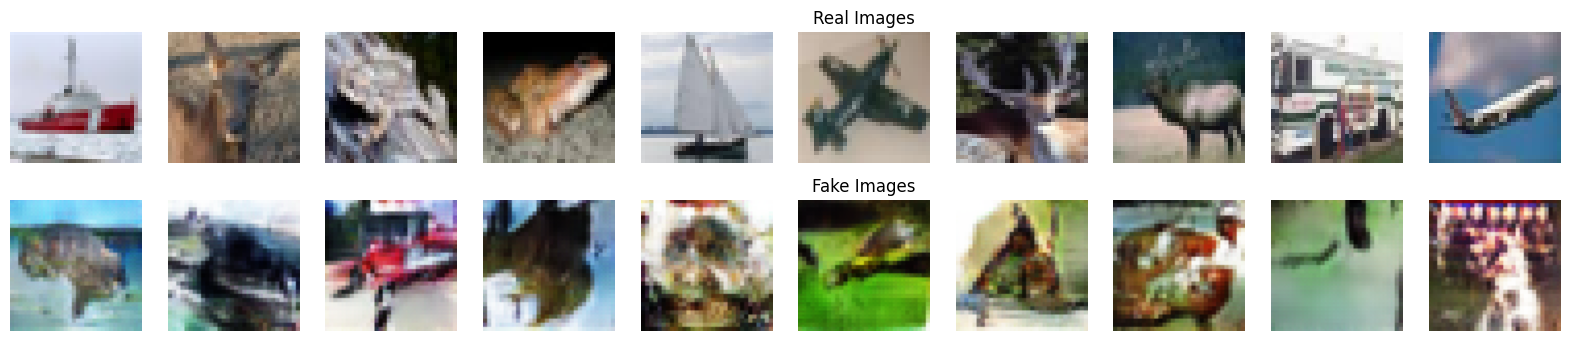

In [21]:
def visualize_comparison(G, cifar_test_loader, z_dim, device, num_images=10):
    # Generate random noise
    z = torch.randn(num_images, z_dim, 1, 1).to(device)
    
    # Generate fake images
    fake_images = G(z)
    
    # Get real images
    real_images, _ = next(iter(cifar_test_loader))
    real_images = real_images[:num_images].to(device)
    
    # Reshape fake images to 64x64
    fake_images = fake_images.view(fake_images.size(0), 3, 64, 64).cpu().detach().numpy()
    real_images = real_images.view(real_images.size(0), 3, 32, 32).cpu().detach().numpy()
    
    # Plot the fake and real images
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        # Plot real images
        plt.subplot(2, num_images, i + 1)
        plt.imshow(np.transpose(real_images[i], (1, 2, 0)) * 0.5 + 0.5)  # Rescale to [0, 1] and transpose to (H, W, C)
        plt.axis('off')
        if i == 5:
            plt.title('Real Images')
        
        # Plot fake images
        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(np.transpose(fake_images[i], (1, 2, 0)) * 0.5 + 0.5)  # Rescale to [0, 1] and transpose to (H, W, C)
        plt.axis('off')
        if i == 5:
            plt.title('Fake Images')
        
        # Add title for fake images
        
    plt.show()

# Visualize comparison
visualize_comparison(G, cifar_test_loader, z_dim, device)

# 1.3

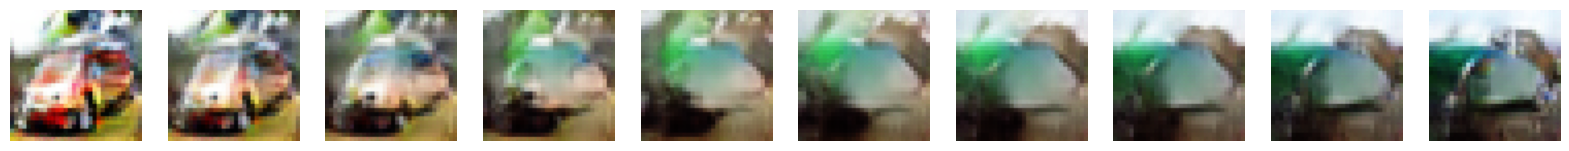

In [22]:
def interpolate_latent_space(G, z_dim, device, num_steps=10):
    # Select two distinct latent vectors
    z1 = torch.randn(1, z_dim, 1, 1).to(device)
    z2 = torch.randn(1, z_dim, 1, 1).to(device)
    
    # Interpolate between the two latent vectors
    interpolated_z = [z1 * (1 - alpha) + z2 * alpha for alpha in np.linspace(0, 1, num_steps)]
    interpolated_z = torch.cat(interpolated_z, dim=0)
    
    # Generate images from the interpolated latent vectors
    with torch.no_grad():
        interpolated_images = G(interpolated_z)
    
    # Reshape images to 64x64
    interpolated_images = interpolated_images.view(interpolated_images.size(0), 3, 64, 64).cpu().numpy()
    
    # Visualize the resulting images
    plt.figure(figsize=(20, 2))
    for i in range(num_steps):
        plt.subplot(1, num_steps, i + 1)
        plt.imshow(np.transpose(interpolated_images[i], (1, 2, 0)) * 0.5 + 0.5)  # Rescale to [0, 1] and transpose to (H, W, C)
        plt.axis('off')
    plt.show()

# Perform latent space interpolation and visualize the results
interpolate_latent_space(G, z_dim, device,10)

The images generated by the generator is not really good as we can only make out certain distinct shapes from it, but just looking at the transition itself, we can say that it is pretty good as there is no jarring or abrud jump in the transition. The generated images smootly transisitons to another image. This helps us verify that that the GAN's latent space is continuous and well-structured.

# 2.1

In [1]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import torchvision.transforms as transforms


In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.0,), (1.0,))
])


# download the MNIST datasets
path = 'data'
train_dataset = MNIST(path, transform=transform, download=True)
test_dataset  = MNIST(path, transform=transform, download=True)

# create train and test dataloaders
batch_size = 100
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# if torch.cuda.is_available() and torch.cuda.device_count() > 2:
#     device = torch.device("cuda:2")
#     print(f"Using GPU: {torch.cuda.get_device_name(2)}")
# else:
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     print("Using default GPU or CPU")

# device

In [ ]:
import torch
import torch.nn as nn
from torchsummary import summary

# This is a custom model I built couple of weeks when I was testing VAE out and this one has skip connection added to it  

class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        
        # Convolutional blocks
        self.cnn_block1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=4, stride=2, padding=1)
        )
        self.cnn_block2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=4, stride=2, padding=1)
        )
        self.cnn_block3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1)
        )
        
        # 1x1 convolution for channel matching in skip connection
        self.skip_conv1 = nn.Conv2d(16, 32, kernel_size=1, stride=1)
        self.skip_conv2 = nn.Conv2d(32, 64, kernel_size=1, stride=1)

        # Encoder layers for latent variables
        self.Flatten = nn.Flatten()
        self.mean_layer = nn.Linear(64 * 3 * 3, 2)
        self.logvar_layer = nn.Linear(64 * 3 * 3, 2)

        # Decoder layers
        self.decoder = nn.Sequential(
            nn.Linear(2, 64 * 3 * 3),
            nn.ReLU(),
            nn.Unflatten(1, (64, 3, 3)),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=3, padding=1),  # 3x3 -> 7x7
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=4, stride=2, padding=2),  # 7x7 -> 14x14
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=4, stride=2, padding=1),  # 14x14 -> 28x28
            nn.Sigmoid()
        )

    def encode(self, x):
        # Forward pass with skip connections before ReLU
        x1 = self.cnn_block1(x)  # Shape: (batch_size, 16, 14, 14)
        x2 = self.cnn_block2(x1)  # Shape: (batch_size, 32, 7, 7)
        
        # Skip connection: use 1x1 convolution to match the channels
        x1_skip = self.skip_conv1(x1)  # Now (batch_size, 32, 14, 14)
        x2 = x2 + nn.functional.interpolate(x1_skip, size=x2.shape[2:])  # Add skip connection before ReLU
        x2 = nn.ReLU()(x2)
        
        x3 = self.cnn_block3(x2)  # Shape: (batch_size, 64, 3, 3)
        
        # Skip connection between cnn_block2 and cnn_block3
        x2_skip = self.skip_conv2(x2)  # Now (batch_size, 64, 7, 7)
        x3 = x3 + nn.functional.interpolate(x2_skip, size=x3.shape[2:])  # Add skip connection before ReLU
        x3 = nn.ReLU()(x3)
        
        # Flatten and pass through latent layers
        x_flattened = self.Flatten(x3)
        mean = self.mean_layer(x_flattened)
        logvar = self.logvar_layer(x_flattened)
        return mean, logvar

    def reparameterization(self, mean, logvar):
        # Reparameterization trick
        epsilon = torch.randn_like(logvar)
        z = mean + torch.exp(0.5 * logvar) * epsilon  # exp(logvar / 2) for standard deviation
        return z

    def decode(self, z):
        # Pass through the decoder
        return self.decoder(z)

    def forward(self, x):
        mean, logvar = self.encode(x)
        z = self.reparameterization(mean, logvar)
        x_hat = self.decode(z)
        return x_hat, mean, logvar

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize model and print summary
model = VAE().to(device)
summary(model, input_size=(1, 28, 28))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 14, 14]             272
            Conv2d-2             [-1, 32, 7, 7]           8,224
            Conv2d-3           [-1, 32, 14, 14]             544
            Conv2d-4             [-1, 64, 3, 3]          32,832
            Conv2d-5             [-1, 64, 7, 7]           2,112
           Flatten-6                  [-1, 576]               0
            Linear-7                    [-1, 2]           1,154
            Linear-8                    [-1, 2]           1,154
            Linear-9                  [-1, 576]           1,728
             ReLU-10                  [-1, 576]               0
        Unflatten-11             [-1, 64, 3, 3]               0
  ConvTranspose2d-12             [-1, 32, 8, 8]          32,800
             ReLU-13             [-1, 32, 8, 8]               0
  ConvTranspose2d-14           [-1, 16,

In [8]:
def loss_function(x, x_hat, mean, log_var):
    reproduction_loss = nn.functional.binary_cross_entropy(x_hat, x, reduction='sum')
    KLD = - 0.5 * torch.sum(1+ log_var - mean.pow(2) - log_var.exp())
    # print(KLD,reproduction_loss + KLD)
    return reproduction_loss + KLD,KLD

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


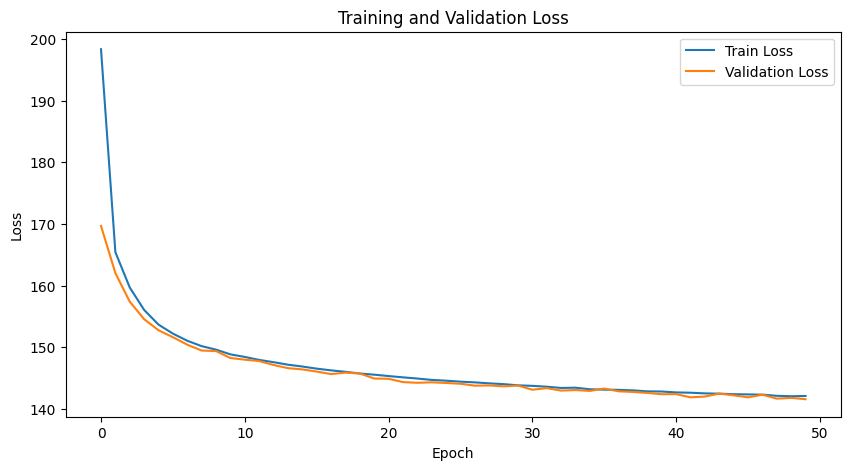

Epoch 50 	Train Loss: 142.08395242070117 	Validation Loss: 141.55611178135433


In [9]:
from IPython.display import clear_output
import matplotlib.pyplot as plt


# Set the environment variable for debugging

# import torchmetrics

# def calculate_accuracy(model, data_loader, device):
#     model.eval()
#     accuracy = torchmetrics.Accuracy(task='multiclass', num_classes=60).to(device)
#     with torch.no_grad():
#         for x, y in data_loader:
#             x = x.to(device)
#             y = y.to(device)
#             x_hat, _, _ = model(x)
#             pred = x_hat.view(x_hat.size(0), -1).argmax(dim=1)  # Adjusted argmax dimension
#             accuracy.update(pred, y)
    # return accuracy.compute().item()

def train(model, optimizer, epochs, device):
    model.train()
    train_losses = []
    val_losses = []
    kld_total = []

    for epoch in range(epochs):
        overall_train_loss = 0
        overall_val_loss = 0
        overall_kld = 0

        # Training loop
        model.train()
        for batch_idx, (x, y) in enumerate(train_loader):  # Include y in the loop
            x = x.to(device)
            y = y.to(device)

            optimizer.zero_grad()

            x_hat, mean, log_var = model(x)
            loss , kld = loss_function(x, x_hat, mean, log_var)  # Use the provided loss function
            
            overall_train_loss += loss.sum().item()  # Summing the losses manually
            overall_kld += kld.sum().item()

            loss.mean().backward()  # Taking the mean for backward pass
            optimizer.step()

        avg_train_loss = overall_train_loss / (batch_idx * batch_size)
        train_losses.append(avg_train_loss)
        kld_total.append(overall_kld/(batch_idx * batch_size))

        # Validation loop
        model.eval()
        with torch.no_grad():
            for batch_idx, (x, y) in enumerate(test_loader):
                x = x.to(device)
                y = y.to(device)

                x_hat, mean, log_var = model(x)
                val_loss,_ = loss_function(x, x_hat, mean, log_var)
                
                overall_val_loss += val_loss.sum().item()

        avg_val_loss = overall_val_loss / (batch_idx * batch_size)
        val_losses.append(avg_val_loss)

        # Plotting the loss
        clear_output(wait=True)
        plt.figure(figsize=(10, 5))
        plt.plot(train_losses, label='Train Loss')
        plt.plot(val_losses, label='Validation Loss')
        # plt.plot(kld_total, label='KLD Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()
        plt.show()

        print(f"Epoch {epoch + 1} \tTrain Loss: {avg_train_loss} \tValidation Loss: {avg_val_loss}")
    
    return train_losses, val_losses,kld_total

train_losses, val_losses,kld_total = train(model, optimizer, epochs=50, device=device)


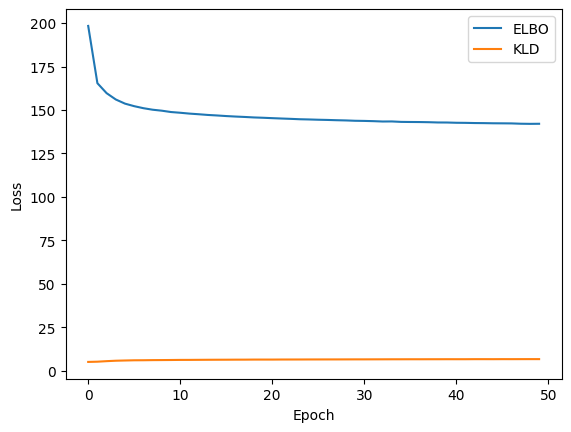

In [12]:
plt.plot(train_losses, label='ELBO')
plt.plot(kld_total, label='KLD')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

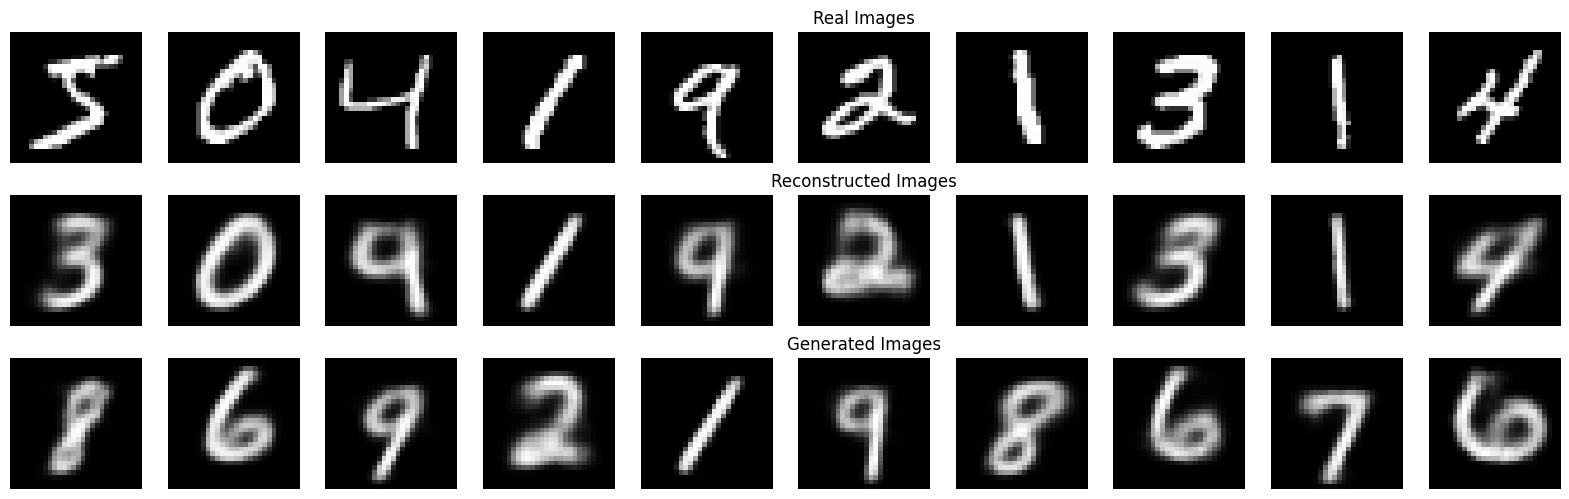

In [31]:
def visualize_reconstruction_and_generation(model, test_loader, z_dim, device, num_images=10):
    model.eval()
    
    # Get a batch of real images
    real_images, _ = next(iter(test_loader))
    real_images = real_images[:num_images].to(device)
    
    # Reconstruct images
    with torch.no_grad():
        reconstructed_images, _, _ = model(real_images)
    
    # Generate new images
    z = torch.randn(num_images, z_dim).to(device)
    with torch.no_grad():
        generated_images = model.decode(z)
    
    # Move images to CPU and convert to numpy
    real_images = real_images.cpu().numpy()
    reconstructed_images = reconstructed_images.cpu().numpy()
    generated_images = generated_images.cpu().numpy()
    
    # Plot the images
    plt.figure(figsize=(20, 6))
    
    for i in range(num_images):
        # Plot real images
        plt.subplot(3, num_images, i + 1)
        plt.imshow(real_images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        if i == num_images // 2:
            plt.title('Real Images')
        
        # Plot reconstructed images
        plt.subplot(3, num_images, num_images + i + 1)
        plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        if i == num_images // 2:
            plt.title('Reconstructed Images')
        
        # Plot generated images
        plt.subplot(3, num_images, 2 * num_images + i + 1)
        plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        if i == num_images // 2:
            plt.title('Generated Images')
    
    plt.show()

# Visualize reconstruction and generation
visualize_reconstruction_and_generation(model, test_loader, z_dim=2, device=device)

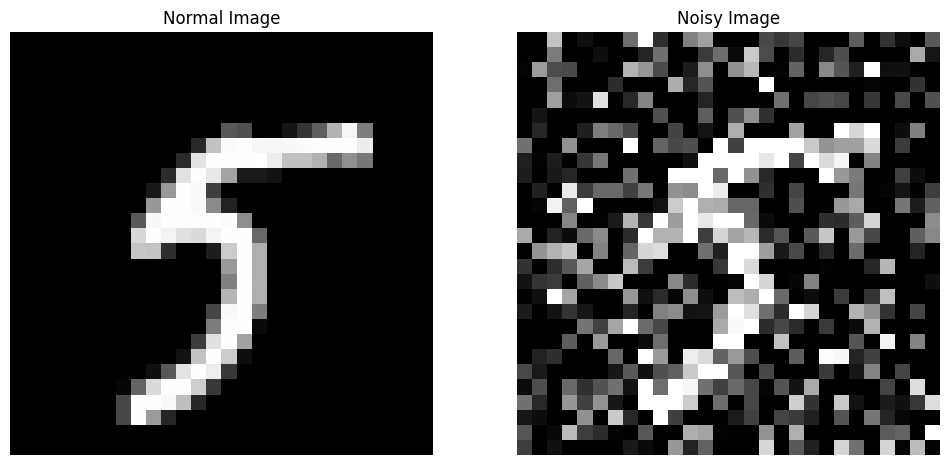

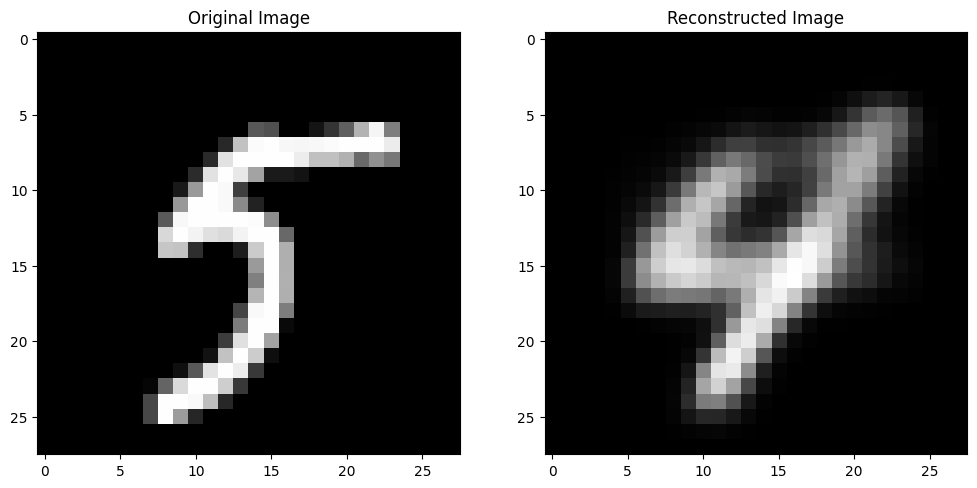

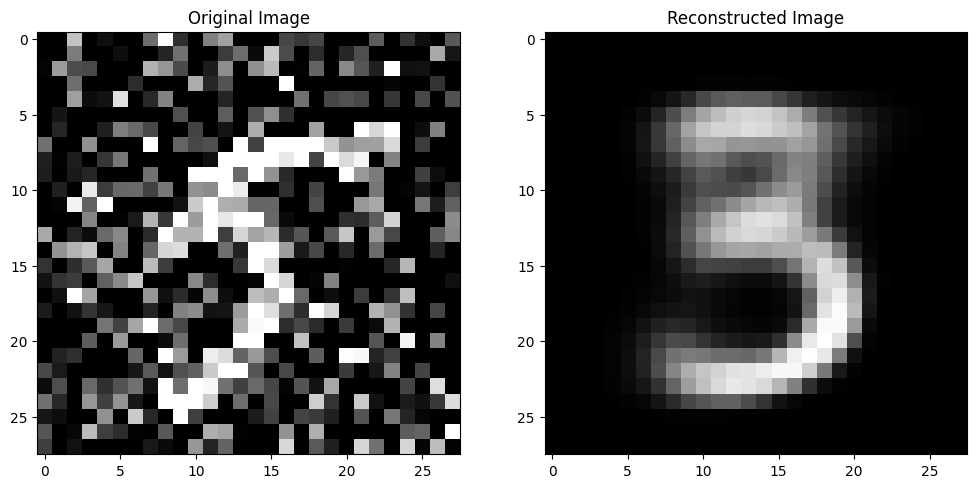

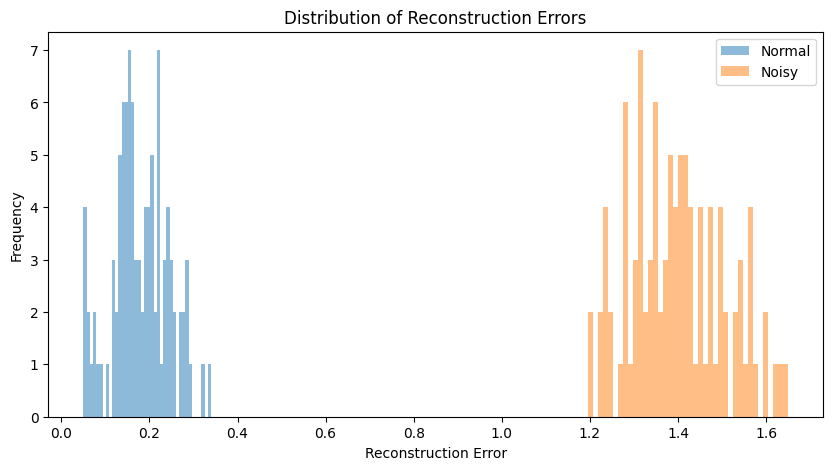

Normal images classified as anomalous: 5 / 100
Noisy images classified as anomalous: 100 / 100


In [50]:
import random

def add_noise_to_images(images, noise_factor=0.5):
    noisy_images = images + noise_factor * torch.randn(*images.shape)
    noisy_images = torch.clip(noisy_images, 0., 1.)
    return noisy_images

def calculate_reconstruction_error(model, images, device):
    model.eval()
    images = images.to(device)
    with torch.no_grad():
        reconstructed_images, _, _ = model(images)

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[1].imshow(reconstructed_images[0].cpu().numpy().squeeze(),cmap='gray')
    axs[1].set_title('Reconstructed Image')
    axs[0].imshow(images[0].cpu().numpy().squeeze(),cmap='gray')
    axs[0].set_title('Original Image')
    plt.show()

    reconstruction_error = torch.nn.functional.binary_cross_entropy(reconstructed_images, images, reduction='none')
    reconstruction_error = torch.mean(reconstruction_error, dim=[1, 2, 3])
    return reconstruction_error.cpu().numpy()

# Get a batch of normal and noisy images
normal_images, _ = next(iter(test_loader))
# Take images from the test_loader randomly
random_indices = random.sample(range(len(test_loader.dataset)), batch_size)
random_sampler = torch.utils.data.Subset(test_loader.dataset, random_indices)
random_loader = DataLoader(random_sampler, batch_size=batch_size, shuffle=False)

# Get a batch of normal and noisy images
normal_images, _ = next(iter(random_loader))
noisy_images = add_noise_to_images(normal_images)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot noisy image
axes[1].imshow(noisy_images[0].squeeze(), cmap='gray')
axes[1].set_title('Noisy Image')
axes[1].axis('off')

# Plot normal image
axes[0].imshow(normal_images[0].squeeze(), cmap='gray')
axes[0].set_title('Normal Image')
axes[0].axis('off')

plt.show()
# Calculate reconstruction errors
normal_reconstruction_errors = calculate_reconstruction_error(model, normal_images, device)
noisy_reconstruction_errors = calculate_reconstruction_error(model, noisy_images, device)

# Plot the distribution of reconstruction errors
plt.figure(figsize=(10, 5))
plt.hist(normal_reconstruction_errors, bins=40, alpha=0.5, label='Normal')
plt.hist(noisy_reconstruction_errors, bins=40, alpha=0.5, label='Noisy')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Reconstruction Errors')
plt.show()

# Set a threshold to classify images as "anomalous" or "normal"
threshold = np.percentile(normal_reconstruction_errors, 95)

# Classify images
normal_classification = normal_reconstruction_errors > threshold
noisy_classification = noisy_reconstruction_errors > threshold

print(f'Normal images classified as anomalous: {np.sum(normal_classification)} / {len(normal_classification)}')
print(f'Noisy images classified as anomalous: {np.sum(noisy_classification)} / {len(noisy_classification)}')

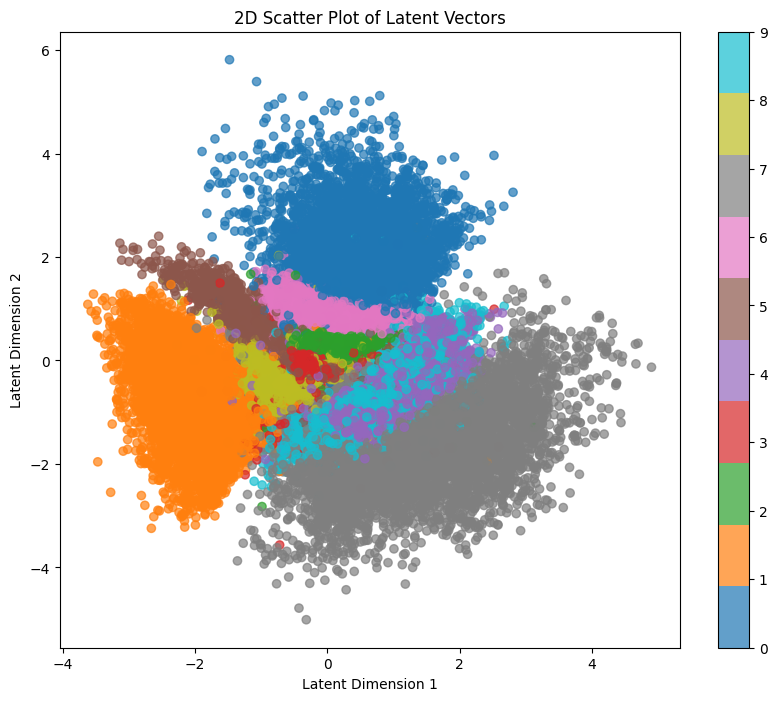

In [22]:
def visualize_latent_space(model, data_loader, device):
    model.eval()
    latent_vectors = []
    labels = []

    with torch.no_grad():
        for x, y in data_loader:
            x = x.to(device)
            mean, logvar = model.encode(x)
            z = model.reparameterization(mean, logvar)
            latent_vectors.append(z.cpu().numpy())
            labels.append(y.cpu().numpy())

    latent_vectors = np.concatenate(latent_vectors, axis=0)
    labels = np.concatenate(labels, axis=0)

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(latent_vectors[:, 0], latent_vectors[:, 1], c=labels, cmap='tab10', alpha=0.7)
    plt.colorbar(scatter, ticks=range(10))
    plt.xlabel('Latent Dimension 1')
    plt.ylabel('Latent Dimension 2')
    plt.title('2D Scatter Plot of Latent Vectors')
    plt.show()

# Visualize the latent space
visualize_latent_space(model, test_loader, device)

Some of the observation that is made here are:
- The blue cluster (likely digit 0) is well-separated in the upper 
- The orange cluster (digit 1) forms a distinct group in the lower left  
- The gray cluster (possibly digit 9) occupies the lower right 
- Clear separation between most major digit classes

The visualization suggests that the model has successfully learned to organize the latent space in a meaningful way, with digits that share similar features being placed closer together in the latent spac